In [1]:
import tweepy

In [2]:
tweepy.__version__

'3.10.0'

In [3]:
# 발급 완료된 Key를 입력
CONSUMER_KEY = 'moihT1iwV8JbPIvP0qfupaw6H'
CONSUMER_SECRET = 'unz6kZJG61mU94ZksooEUpyw5KOXrLmt7FtCxcHGGyJUe8aP1K'
ACCESS_TOKEN_KEY = '1486551414822236162-n00voN2RVqWWw6u5I3aMNO6q59r5oX'
ACCES_TOKEN_SECRET = 'xSZHiz4ThXTyXeTjKAvwFr3mYyZSAkPXbtco0948ptUVl'

# 개인정보 인증을 요청하는 Handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# 인증 요청을 수행
auth.set_access_token(ACCESS_TOKEN_KEY, ACCES_TOKEN_SECRET)

# twitter API를 사용하기 위한 준비
api = tweepy.API(auth)

#twitter API를 사용하여 단어를 검색하여 트윗들을 크롤링한뒤, 추출
keyword = '패션'
tweets = api.search(keyword) # 특정 키워드 크롤링을 위해 search() 함수 사용

In [4]:
# 메타데이터에 접근 하기 위해 entities() 함수 사용
for tweet in tweets:
    print(tweet.entities['user_mentions'])
    print(tweet.entities['hashtags'])
    print(tweet.text)

[{'screen_name': 'LALISA_BR_TEAM', 'name': '𝕃𝔸𝕃𝕀𝕊𝔸 𝔹ℝ𝔸ℕ𝔻 ℝ𝔼ℙ𝕌𝕋𝔸𝕋𝕀𝕆ℕ 𝕋𝔼𝔸𝕄❃', 'id': 1326636503473250307, 'id_str': '1326636503473250307', 'indices': [3, 18]}]
[{'text': '리사', 'indices': [135, 138]}]
RT @LALISA_BR_TEAM: dispatch news and 인사이트 패션 facebook posts with 블랙핑크 리사. Engage!

🔗https://t.co/OXX4otDZ2Y
🔗https://t.co/ZOMzICWzK2

#리사…
[{'screen_name': 'karinabrands', 'name': 'KARINABRANDS', 'id': 1340729474007007232, 'id_str': '1340729474007007232', 'indices': [0, 13]}]
[{'text': 'KARINA', 'indices': [64, 71]}, {'text': '에스파카리나', 'indices': [80, 87]}, {'text': '카리나', 'indices': [88, 92]}, {'text': 'カリナ', 'indices': [97, 101]}]
@karinabrands 에스파 카리나 패션
에스파 카리나 예쁜
에스파 카리나 메인 댄서 
aespa Karina #KARINA
에스파 카리나 #에스파카리나 #카리나
カリナ #カリナ 36
[{'screen_name': 'mistletoebirdy', 'name': 'LEESA', 'id': 1297792243135213569, 'id_str': '1297792243135213569', 'indices': [3, 18]}]
[{'text': '패션', 'indices': [136, 139]}]
RT @mistletoebirdy: 미드 한니발 AU 일레이. 잔인성때문에 진짜 보기 힘든 미드였지만 독보적인 분위기랑 대사가 맘에 들어서..🥺🤍 나중에 윌

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 크롤링된 데이터를 저장할 데이터 프레임 
columns = ['created','tweet_text']
df = pd.DataFrame(columns = columns)

# 크롤링을 수행할 갯수를 입력하고, Cursor 객체를 사용하여 크롤링을 수행
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search, q=keyword).items(max_tweets)]

In [7]:
# 키워드가 포함된 1000개의 트윗들에서. 'text','created_at' 정보를 데이터 프레임으로 저장

for tweet in searched_tweets:
    tweet_json = tweet._json
    tweet_text = tweet._json['text']
    created = tweet._json['created_at']
    row = [created, tweet_text]
    series = pd.Series(row, index = df.columns)
    df = df.append(series, ignore_index = True)

In [8]:
df

,created,tweet_text
0,Thu Feb 10 06:17:10 +0000 2022,RT @LALISA_BR_TEAM: dispatch news and 인사이트 패션 ...
1,Thu Feb 10 06:15:11 +0000 2022,@karinabrands 에스파 카리나 패션\n에스파 카리나 예쁜\n에스파 카리나 ...
2,Thu Feb 10 06:14:41 +0000 2022,RT @mistletoebirdy: 미드 한니발 AU 일레이. 잔인성때문에 진짜 보...
3,Thu Feb 10 06:14:34 +0000 2022,@karinabrands 에스파 카리나 패션\n에스파 카리나 예쁜\n에스파 카리나 ...
4,Thu Feb 10 06:14:16 +0000 2022,RT @351blue: 저 이 브리오쉬 집업\n실 약 800그램 썼어요.....\n...
...,...,...
995,Thu Feb 10 03:32:16 +0000 2022,RT @onlyyuju_you: 도로시 패션ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
996,Thu Feb 10 03:32:16 +0000 2022,RT @noze__baby: 리더즈 완전체 K-할머니 패션 #해치지않아\n#모니카 ...
997,Thu Feb 10 03:31:55 +0000 2022,@Robinonion 오 신세대패션임? ㅋㅋㅋㅋ
998,Thu Feb 10 03:31:49 +0000 2022,"RT @newsenstar: 원어스(ONEUS) 출국, '건강하게 다녀 올게요' #..."


In [9]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('',text)
    return result

# tweet_text 피처에 이를 적용
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,Thu Feb 10 06:17:10 +0000 2022,RT @LALISA_BR_TEAM: dispatch news and 인사이트 패션 ...,인사이트 패션 블랙핑크 리사 리사
1,Thu Feb 10 06:15:11 +0000 2022,@karinabrands 에스파 카리나 패션\n에스파 카리나 예쁜\n에스파 카리나 ...,에스파 카리나 패션에스파 카리나 예쁜에스파 카리나 메인 댄서 에스파 카리나 에...
2,Thu Feb 10 06:14:41 +0000 2022,RT @mistletoebirdy: 미드 한니발 AU 일레이. 잔인성때문에 진짜 보...,미드 한니발 일레이 잔인성때문에 진짜 보기 힘든 미드였지만 독보적인 분위기랑 ...
3,Thu Feb 10 06:14:34 +0000 2022,@karinabrands 에스파 카리나 패션\n에스파 카리나 예쁜\n에스파 카리나 ...,에스파 카리나 패션에스파 카리나 예쁜에스파 카리나 보컬 에스파 카리나 에스...
4,Thu Feb 10 06:14:16 +0000 2022,RT @351blue: 저 이 브리오쉬 집업\n실 약 800그램 썼어요.....\n...,저 이 브리오쉬 집업실 약 그램 썼어요패션아란 두 볼 거의 다 썼습니다


In [10]:
from konlpy.tag import Okt
from collections import Counter

korea_stopwords_path = 'korean_stopwords.txt'

with open(korea_stopwords_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()

stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns = Okt().nouns(x)
    
    # 한 글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

# ko_text 피처에 이를 적용
df['nouns'] = df['ko_text'].apply(lambda x:get_nouns(x))
print(df.shape)
df.head()

(1000, 4)


,created,tweet_text,ko_text,nouns
0,Thu Feb 10 06:17:10 +0000 2022,RT @LALISA_BR_TEAM: dispatch news and 인사이트 패션 ...,인사이트 패션 블랙핑크 리사 리사,"[인사이트, 패션, 블랙, 핑크, 리사, 리사]"
1,Thu Feb 10 06:15:11 +0000 2022,@karinabrands 에스파 카리나 패션\n에스파 카리나 예쁜\n에스파 카리나 ...,에스파 카리나 패션에스파 카리나 예쁜에스파 카리나 메인 댄서 에스파 카리나 에...,"[에스, 카리나, 패션, 스파, 카리나, 스파, 카리나, 메인, 댄서, 에스, 카리..."
2,Thu Feb 10 06:14:41 +0000 2022,RT @mistletoebirdy: 미드 한니발 AU 일레이. 잔인성때문에 진짜 보...,미드 한니발 일레이 잔인성때문에 진짜 보기 힘든 미드였지만 독보적인 분위기랑 ...,"[미드, 한니발, 레이, 잔인성, 때문, 진짜, 보기, 미드, 독보, 분위기, 대사..."
3,Thu Feb 10 06:14:34 +0000 2022,@karinabrands 에스파 카리나 패션\n에스파 카리나 예쁜\n에스파 카리나 ...,에스파 카리나 패션에스파 카리나 예쁜에스파 카리나 보컬 에스파 카리나 에스...,"[에스, 카리나, 패션, 스파, 카리나, 스파, 카리나, 보컬, 에스, 카리나, 에..."
4,Thu Feb 10 06:14:16 +0000 2022,RT @351blue: 저 이 브리오쉬 집업\n실 약 800그램 썼어요.....\n...,저 이 브리오쉬 집업실 약 그램 썼어요패션아란 두 볼 거의 다 썼습니다,"[브리, 오쉬, 그램, 패션, 아란]"


In [11]:
from apyori import apriori

# 장바구니 형태의 데이터(트랙젼션 데이터 )를 생성
transactions = [
    ['패션','블랙'],
    ['패션','빈티지'],
    ['패션','명품','유행'] 
]

#연관 분석을 수행
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'명품'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'명품'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'블랙'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'블랙'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'빈티지'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'빈티지'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'유행'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'유행'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'패션'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'패션'}), confidence=1.0, lift=1.0)])
RelationRecord(items=fr

In [12]:
# 지지도 0.5, 신뢰도 0.6, 형상도 1.0 이상이면서 ('패션','블랙')처럼 규칙의 크기가 2 이하인 규칙을 추출
list(apriori(transactions,
            min_support=0.5,
            min_confidence = 0.6,
            min_lift = 1.0,
            max_length = 2))

[RelationRecord(items=frozenset({'패션'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'패션'}), confidence=1.0, lift=1.0)])]

In [13]:
# 트랜잭션 데이터를 추출
transactions = df['nouns'].tolist()
#공백 문자열을 방지
transactions =[transaction for transaction in transactions if transaction]
print(transactions)

[['인사이트', '패션', '블랙', '핑크', '리사', '리사'], ['에스', '카리나', '패션', '스파', '카리나', '스파', '카리나', '메인', '댄서', '에스', '카리나', '에스', '파카', '리나', '카리나'], ['미드', '한니발', '레이', '잔인성', '때문', '진짜', '보기', '미드', '독보', '분위기', '대사', '나중', '태의', '크리스', '베델', '리아', '특별출연', '구상', '패션'], ['에스', '카리나', '패션', '스파', '카리나', '스파', '카리나', '보컬', '에스', '카리나', '에스', '파카', '리나', '카리나'], ['브리', '오쉬', '그램', '패션', '아란'], ['인간', '구찌', '엑소', '카이', '컬렉션', '완벽', '소화', '패션', '뷰티', '라이프', '기사', '본문', '문화', '뉴스', '엑소', '카이', '카이', '김종인'], ['에스', '카리나', '패션', '에스', '카리나', '에스', '카리나', '시크', '스파', '카리나', '스타일', '스파', '카리나', '메인', '댄서'], ['격리', '육아', '유피', '뮤지컬', '웨딩', '젠더', '아완', '민혁', '외국', '포차', '공항', '연애', '어플', '추천', '일상', '서울', '양천구', '여자', '아나고', '인스타', '패션', '석호', '속초', '의지', '아줌마', '그램', '회식'], ['에스', '카리나', '패션', '스파', '카리나', '에스', '카리나', '메인', '댄서', '에스', '카리나', '에스', '파카', '리나', '카리나'], ['에스', '카리나', '패션', '에스', '카리나', '시크', '스파', '카리나', '스타일', '스파', '카리나', '메인', '댄서', '에스', '카리나', '에스', '파카', '리나', '카리나'], ['민윤기', '올블랙', '공

In [14]:
# 연관 분석을 수행
results = list(apriori(transactions,
            min_support=0.05,
            min_confidence = 0.1,
            min_lift = 5,
            max_length = 2))
print(results)

[RelationRecord(items=frozenset({'나중', '구상'}), support=0.07754279959718026, ordered_statistics=[OrderedStatistic(items_base=frozenset({'구상'}), items_add=frozenset({'나중'}), confidence=1.0, lift=12.569620253164556), OrderedStatistic(items_base=frozenset({'나중'}), items_add=frozenset({'구상'}), confidence=0.9746835443037974, lift=12.569620253164556)]), RelationRecord(items=frozenset({'대사', '구상'}), support=0.07754279959718026, ordered_statistics=[OrderedStatistic(items_base=frozenset({'구상'}), items_add=frozenset({'대사'}), confidence=1.0, lift=12.896103896103897), OrderedStatistic(items_base=frozenset({'대사'}), items_add=frozenset({'구상'}), confidence=1.0, lift=12.896103896103897)]), RelationRecord(items=frozenset({'독보', '구상'}), support=0.07754279959718026, ordered_statistics=[OrderedStatistic(items_base=frozenset({'구상'}), items_add=frozenset({'독보'}), confidence=1.0, lift=12.896103896103897), OrderedStatistic(items_base=frozenset({'독보'}), items_add=frozenset({'구상'}), confidence=1.0, lift=12.89610

In [15]:
# 데이터 프레임  형태를 정리
columns = ['source','target','support']
network_df = pd.DataFrame(columns = columns)

#규칙의 조건절 ''source', 결과절을 'target',지지도를 'support'라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index = network_df.columns)
        network_df = network_df.append(series, ignore_index = True)
        
network_df.head()

,source,target,support
0,나중,구상,0.077543
1,대사,구상,0.077543
2,독보,구상,0.077543
3,구상,때문,0.077543
4,레이,구상,0.077543


In [16]:
# 말뭉치를 추출
tweet_corpus = ''.join(df['ko_text'].tolist())

#명사 키워드를 추출
nouns = Okt().nouns(tweet_corpus)
count = Counter(nouns)

# 한 글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 'node', 'nodesize'라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns = ['node','nodesize'])
# 시각화의 편의를 위해 'nodesize' 50 이하는 제거
node = node_df[node_df['nodesize']>=50]
node.head()

,node,nodesize
1,패션,859
2,블랙,431
3,핑크,406
5,에스,92
6,카리나,212


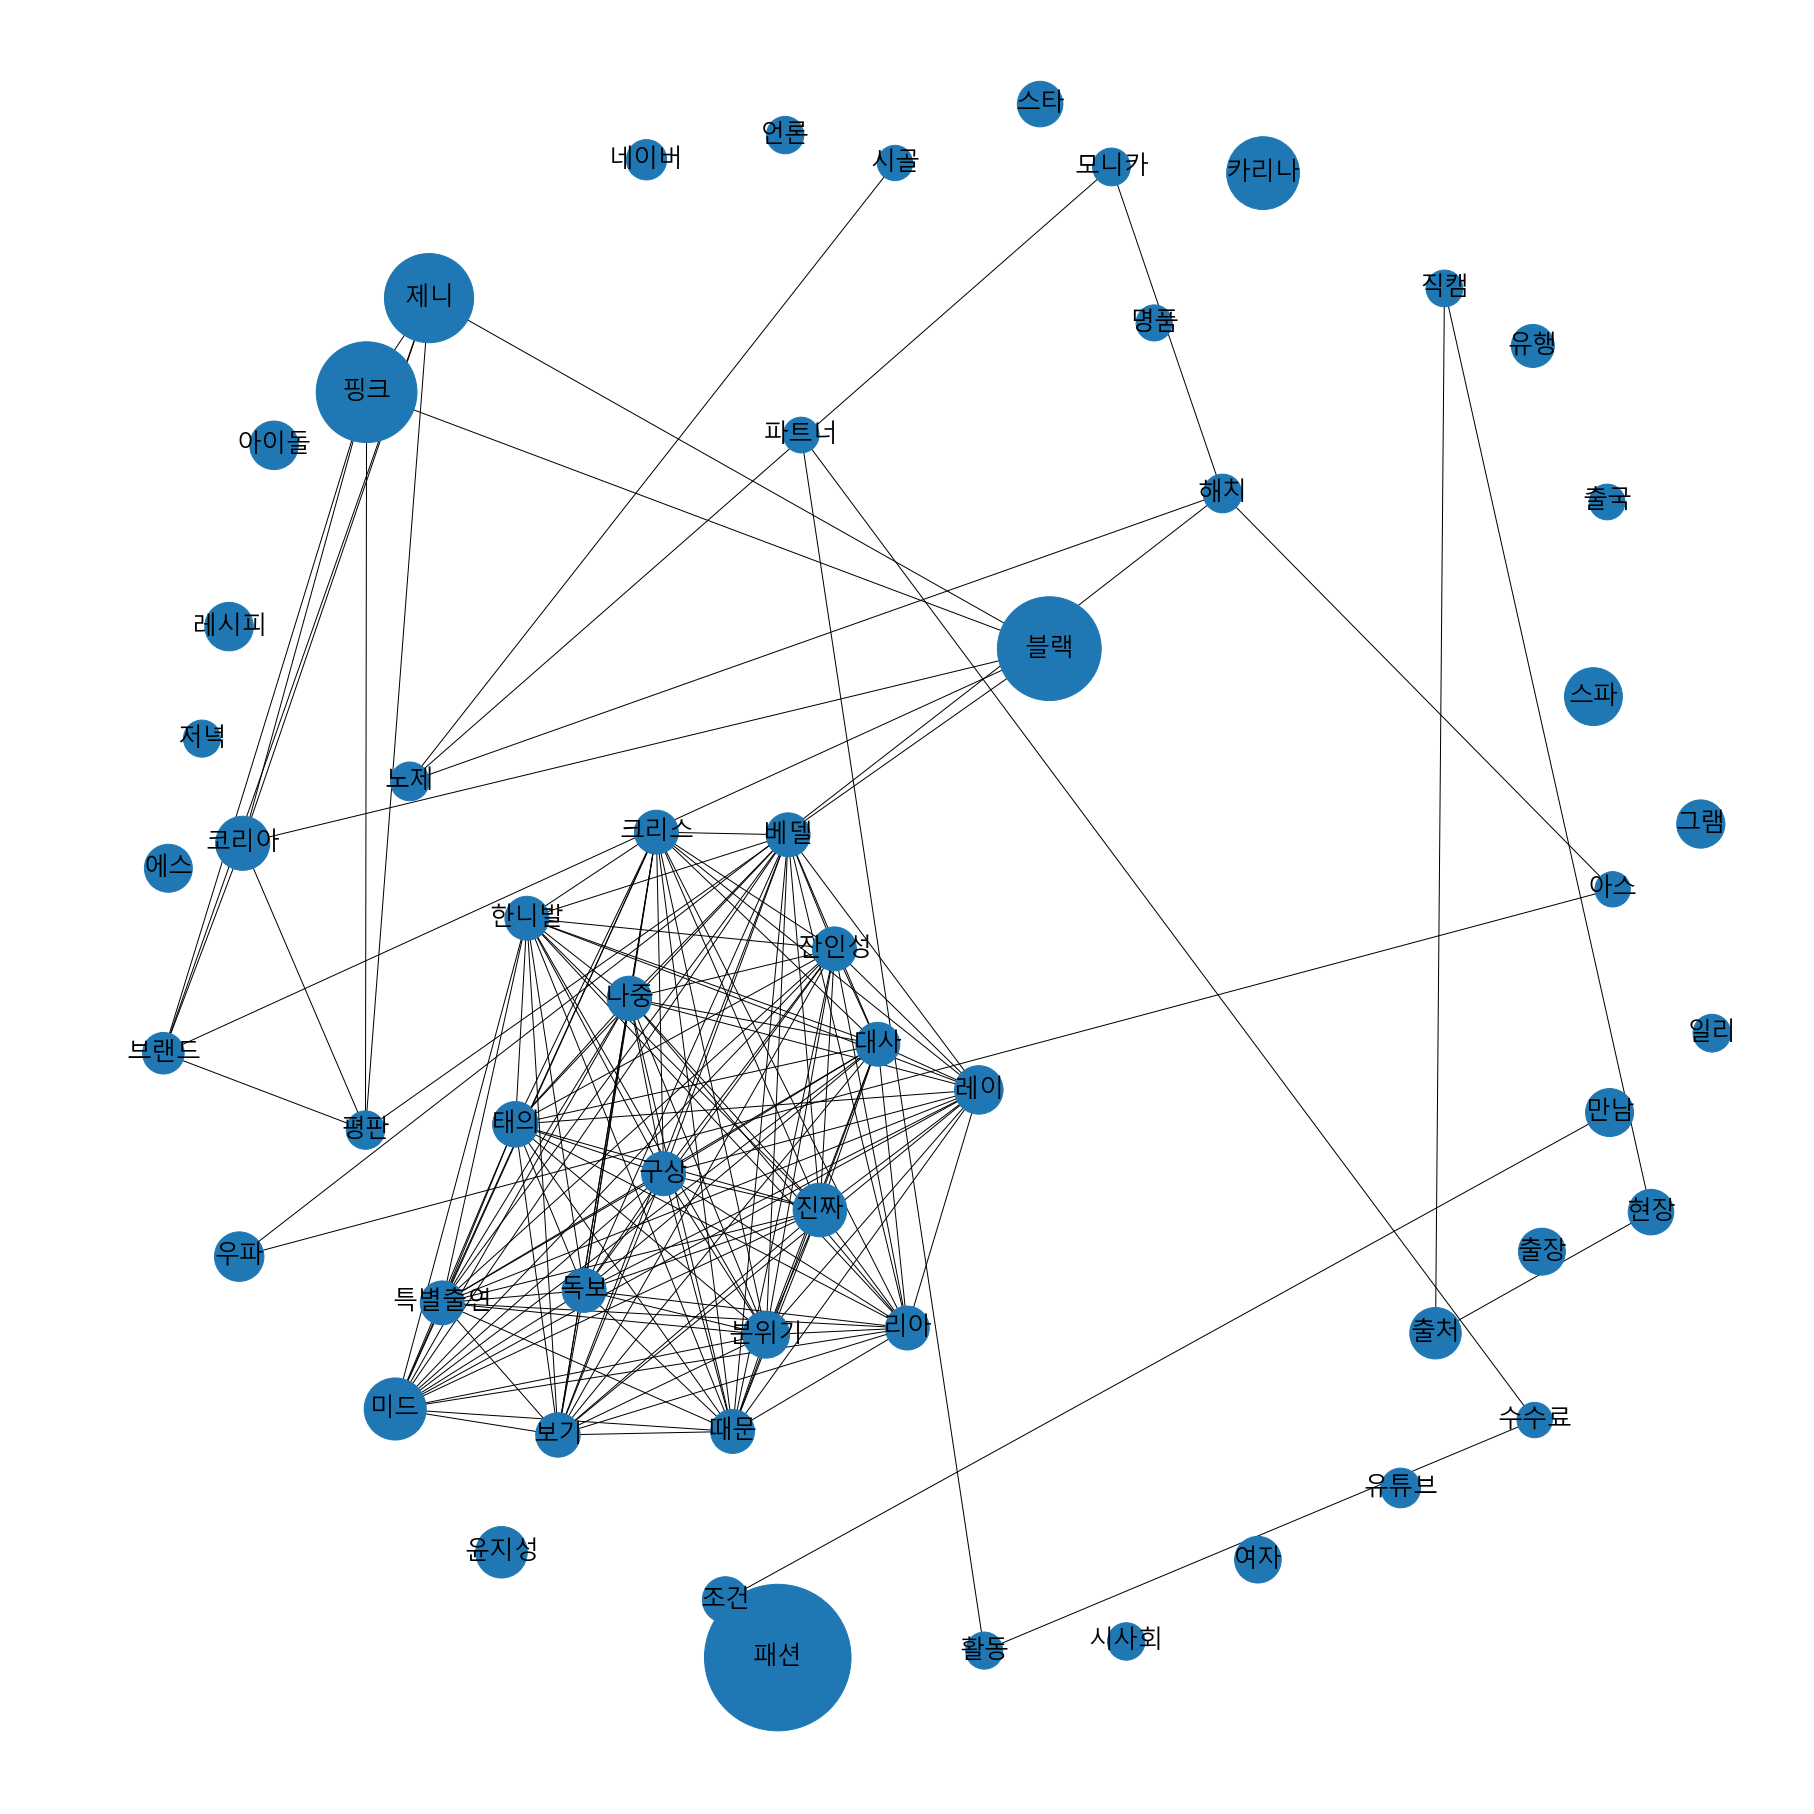

In [17]:
import networkx as nx

plt.figure(figsize=(25,25))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node의 키워드 빈도수를 데이터로 하여 네트워크 그래프의 '노드' 역활을 하는 원을 생성

for index, row in node.iterrows():
    G.add_node(row['node'], nodesize = row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로 네트워크 그래프의 '관계'  역활을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정
pos = nx.spring_layout(G,k=0.6,iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos = pos, node_size = sizes)

#윈도우 사용자는 AppleGothic 대신, 'Malgun Gothic'. 그 외 OS는 OS에서 한글을 지원하는 기본 폰트를 입력
nx.draw_networkx_labels(G, pos= pos, font_family = 'Malgun Gothic', font_size = 25)

# 그래프 출력
ax = plt.gca()
plt.show()